In [11]:
# This is a sentiment analysis program that parses tweets fetched from twitter using python
import tweepy
from textblob import TextBlob
from wordcloud import wordcloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [13]:
api_key = "fFFEWOEw45pbuKEf5Js7kfSV0"
api_secret ="KnwCx9Mgj2FVpBiTH4NZVd0SuKsW0UAKRSYXEubDetKK3MQwGw"
access_token = "1267649228815335424-CbZjrmZEmW528Ctc9NviqivnUDXJVM"
access_token_secret = "JN8xiobMzZIR9q2z2rRsi4MbKVC7bcWOiBgMdVTNzsMPg"

authenticate=tweepy.OAuthHandler(api_key, api_secret)

In [14]:
authenticate.set_access_token(access_token, access_token_secret)

In [15]:
api=tweepy.API(authenticate,wait_on_rate_limit=True)

In [21]:
# Extract 100 tweets from twitter user
posts=api.user_timeline(screen_name='BillGates',count=100,lang='en', tweet_mode='extended')

i=1
print('show 5 recent tweets: \n')
for tweet in posts[0:5]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i+=1

show 5 recent tweets: 

1) I look forward to working with the new administration and leaders on both sides in Congress on getting the surging pandemic under control, engaging partners around the world on issues like poverty and climate change, and addressing issues of inequality and opportunity at home.

2) Congratulations to President-Elect Biden and Vice President-Elect Harris. Thank you to the election officials and campaign workers who worked tirelessly to ensure a record number of Americans could cast a ballot and have it counted during such an challenging time for our country.

3) Here in Washington, we always vote by mail. It's a safe and secure way to shape the future of our country. But regardless of whether you vote by mail or in person this year, I hope you plan to make your voice heard. Visit https://t.co/TmsHAC9MGv for more information.

4) @MohamedBinZayed The UAE is an essential partner in stopping polio in Pakistan. Thank you @MohamedBinZayed for your continued commitme

In [22]:
#create a dataframe with a column called tweets
df=pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

df.head()

,Tweets
0,I look forward to working with the new adminis...
1,Congratulations to President-Elect Biden and V...
2,"Here in Washington, we always vote by mail. It..."
3,@MohamedBinZayed The UAE is an essential partn...
4,"For decades, @Rotary has worked tirelessly to ..."


In [25]:
# Data Cleaning
# create a function to clean tweets
def cleantxt(text):
    text=re.sub(r'@[A-Za-z0-9]+', '', text) 
    text=re.sub(r'#', '', text)
    text=re.sub(r'RT[\s]+', '', text)
    text=re.sub(r'https?:\/\/\S+', '',text)
    return text

df['Tweets']=df['Tweets'].apply(cleantxt)

df



,Tweets
0,I look forward to working with the new adminis...
1,Congratulations to President-Elect Biden and V...
2,"Here in Washington, we always vote by mail. It..."
3,The UAE is an essential partner in stopping p...
4,"For decades, has worked tirelessly to EndPoli..."
...,...
95,Most of my conversations these days are about ...
96,Thank you for the conversation and partnersh...
97,I’m hopeful that this program will improve our...
98,: When will America be able to get back to wor...


In [29]:
# create a function to get subjectivity
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity']=df['Tweets'].apply(getsubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

df.head()

,Tweets,Subjectivity,Polarity
0,I look forward to working with the new adminis...,0.577273,0.268182
1,Congratulations to President-Elect Biden and V...,0.750000,0.250000
2,"Here in Washington, we always vote by mail. It...",0.431250,0.350000
3,The UAE is an essential partner in stopping p...,0.300000,0.000000
4,"For decades, has worked tirelessly to EndPoli...",0.250000,0.250000


In [31]:
df.shape

(100, 3)

In [45]:
# Word Cloud
allwords=' '.join( [twts for twts in df['Tweets']])

In [49]:
wrdcld=WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allwords)

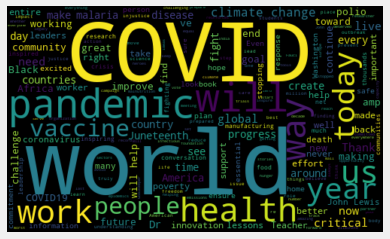

In [51]:
plt.imshow(wrdcld,interpolation='bilinear')
plt.axis('off')
plt.show()

In [73]:
# Function to compute negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis']=df['Polarity'].apply(getAnalysis)

df.head(20)

,Tweets,Subjectivity,Polarity,Analysis
0,I look forward to working with the new adminis...,0.577273,0.268182,Positive
1,Congratulations to President-Elect Biden and V...,0.750000,0.250000,Positive
2,"Here in Washington, we always vote by mail. It...",0.431250,0.350000,Positive
3,The UAE is an essential partner in stopping p...,0.300000,0.000000,Neutral
4,"For decades, has worked tirelessly to EndPoli...",0.250000,0.250000,Positive
5,": Even with his busy schedule, Dr. Fauci took ...",0.294444,-0.027778,Negative
6,I’ve been working for some time on a book abou...,0.375000,0.187500,Positive
7,It’s inspiring to see so much passion these da...,0.650000,0.316667,Positive
8,India’s research and manufacturing capacity ar...,0.900000,0.250000,Positive
9,Europe has an opportunity to get its economy b...,0.400000,0.300000,Positive


In [61]:
# Print all positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]=='Positive'):
        print(str(j)+')'+sortedDF['Tweets'][i])
        j=j+1
        print()

1)I look forward to working with the new administration and leaders on both sides in Congress on getting the surging pandemic under control, engaging partners around the world on issues like poverty and climate change, and addressing issues of inequality and opportunity at home.

2)Congratulations to President-Elect Biden and Vice President-Elect Harris. Thank you to the election officials and campaign workers who worked tirelessly to ensure a record number of Americans could cast a ballot and have it counted during such an challenging time for our country.

3)Here in Washington, we always vote by mail. It's a safe and secure way to shape the future of our country. But regardless of whether you vote by mail or in person this year, I hope you plan to make your voice heard. Visit  for more information.

4)For decades,  has worked tirelessly to EndPolio. Today, the health infrastructure they’ve built around the world is supporting the COVID-19 response. WorldPolioDay 

5)I’ve been working

In [74]:
# Print negative tweets
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Negative'):
        print(str(j) + ')' + sortedDF['Tweets'][i])
        print()
        j=j+1 

1): Even with his busy schedule, Dr. Fauci took the time to sit down with me (AGAIN) and talk about what we’ve gotten right…

2): What do COVID-19 and malaria have to do with each other?  

When COVID-19 struck, it disrupted the entire global healt…

3)To prevent the worst effects of climate change, we need innovation across all sectors—especially in the hardest to decarbonize sectors—to get us on a viable path to net-zero emissions. 

4)Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise may never start college. This would be disastrous for these young people and for the country. Here’s what we’re doing to help: 

5): Three lessons that have been central to the COVID19 response in South Africa, Liberia, &amp; other countries:
🔸 Screening…

6)Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year.  founded _Tele to address this often-overlo

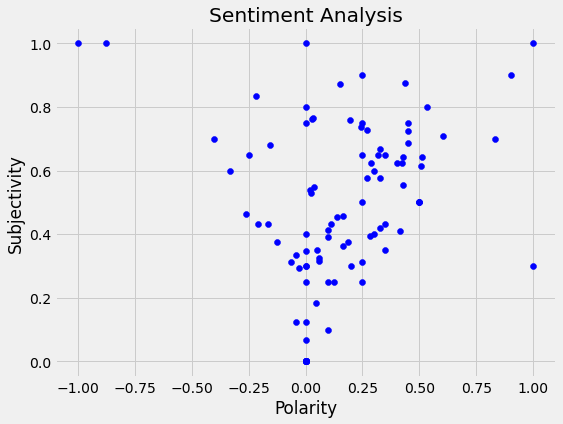

In [75]:
# Plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [69]:
# Get percentage of positive tweets
ptweets = df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100,1)

62.0

In [79]:
# Get percentage of neutral tweets
ntweets = df[df.Analysis=='Neutral']
ntweets=ntweets['Tweets']

round((ntweets.shape[0]/df.shape[0])*100,1)

23.0

In [78]:
# Get percentage of negative tweets
negtweets = df[df.Analysis=='Negative']
negtweets=negtweets['Tweets']

round((negtweets.shape[0]/df.shape[0])*100,1)

15.0

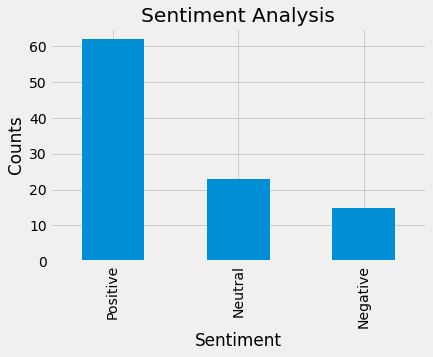

In [80]:
# Show Value Counts
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()